This model scored  
Training RMSE: 98840.5703125  
Test RMSE: 145813.734375  

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from Notebooks.preprocessing import main, sort_data

warnings.filterwarnings("ignore")
color_pallet = sns.color_palette("husl", 8)

In [2]:
df_original = pd.read_csv("raw_sales.csv")

In [3]:
df_edited = main(df_original, tree_ensemble=True)

In [4]:
df_edited

,post_code,price,property_type,bedrooms,outlier,day_of_week,year,month
0,7,525000,0,4,0,2,0,2
1,22,290000,0,3,0,1,0,2
2,21,328000,0,3,0,2,0,3
3,21,380000,0,4,0,4,0,3
4,22,310000,0,3,0,2,0,3
...,...,...,...,...,...,...,...,...
29575,18,657500,0,4,0,4,12,7
29576,1,589000,1,2,0,4,12,7
29577,21,610000,0,4,0,5,12,7
29578,12,647500,0,4,0,5,12,7


In [5]:
# Splitting the data into training and testing sets
X = df_edited.drop(columns=["price"]).to_numpy()
y = df_edited["price"].to_numpy()

# Splitting the data into training, testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
# Create th1e model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6)

# Fit the model
model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
train_predections = model.predict(X_train)
train_error = root_mean_squared_error(y_train, train_predections)

test_predictions = model.predict(X_test)
test_error = root_mean_squared_error(y_test, test_predictions)

print(f"Training RMSE: {train_error}")
print(f"Test RMSE: {test_error}")

Training RMSE: 98840.5703125
Test RMSE: 145813.734375


In [8]:
df_original = pd.read_csv("raw_sales.csv")
df_original = sort_data(df_original)

# Create a test and train dataframe
df_original["month"] = pd.to_datetime(df_original["datesold"]).dt.to_period("M")

df_test = df_original.iloc[len(X_train) :]
df_test["predicted_price"] = test_predictions

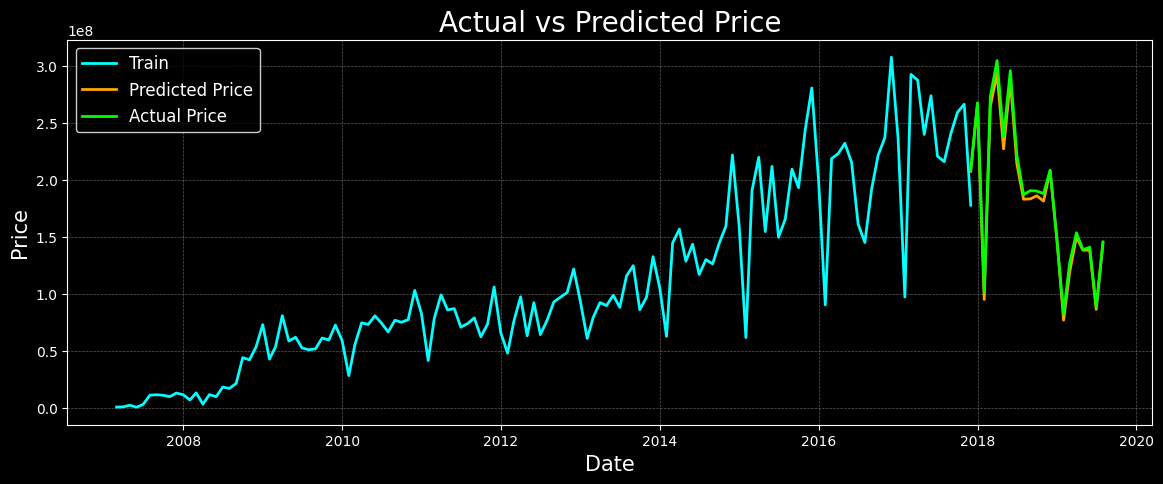

In [10]:
# Apply dark background style
plt.style.use("dark_background")

# Create the figure
plt.figure(figsize=(14, 5))

# Plot training data
plt.plot_date(
    x=df_original.iloc[: len(X_train)].groupby("month")["price"].sum().index,
    y=df_original.iloc[: len(X_train)].groupby("month")["price"].sum(),
    linestyle="-",
    marker=None,
    label="Train",
    color="cyan",
    linewidth=2,
)

# Plot predicted prices
plt.plot_date(
    x=df_test.groupby("month")["predicted_price"].sum().index,
    y=df_test.groupby("month")["predicted_price"].sum(),
    linestyle="-",
    marker=None,
    label="Predicted Price",
    color="orange",
    linewidth=2,
)

# Plot actual prices
plt.plot_date(
    x=df_original.iloc[len(X_train) :].groupby("month")["price"].sum().index,
    y=df_original.iloc[len(X_train) :].groupby("month")["price"].sum(),
    linestyle="-",
    marker=None,
    label="Actual Price",
    color="lime",
    linewidth=2,
)

# Add title and labels with increased size
plt.title("Actual vs Predicted Price", size=20, color="white")
plt.xlabel("Date", size=15, color="white")
plt.ylabel("Price", size=15, color="white")

# Add legend with better visibility
plt.legend(fontsize=12, loc="upper left", facecolor="black", edgecolor="white")

# Add grid lines for better readability
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()
